In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
tables = pd.read_html(file_path)

for i, table in enumerate(tables):
    print(f"Таблиця {i}:\n", table.head())

Таблиця 0:
           0            1
0  Точність  переглянута
Таблиця 1:
                                    Населення України  \
0  Статево-вікова піраміда населення України на 1...   
1                                        Чисельність   
2                                            Густота   
3                                Коефіцієнт міграції   
4                                      Природний рух   

                                 Населення України.1  
0  Статево-вікова піраміда населення України на 1...  
1                   ▼ 40,96 млн (1 лютого 2022) осіб  
2                                   ▼ 68,2 особи/км²  
3                                             ▲0,9 ‰  
4                                      Природний рух  
Таблиця 2:
     0                                                  1
0 NaN  На цьому місці має відображатися графік чи діа...
Таблиця 3:
     0                                                  1
0 NaN  На цьому місці має відображатися графік чи діа...
Таблиця

In [39]:
data = tables[13]
print("Перші рядки таблиці:")
data.head()


Перші рядки таблиці:


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [40]:
rows, columns = data.shape
print(f"Таблиця містить {rows} рядків та {columns} стовпців.")


Таблиця містить 28 рядків та 9 стовпців.


In [41]:
data.replace('—', pd.NA, inplace=True)
print(data.dtypes)


Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [42]:
for column in data.columns[1:]:  # Пропускаємо колонку з регіонами
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [43]:
missing_fraction = data.isnull().sum() / len(data)
print("Частка пропусків у кожному стовпці:")
print(missing_fraction)


Частка пропусків у кожному стовпці:
Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [44]:
data = data.iloc[:-1]  # Видаляємо останній рядок

In [46]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців 
numeric_columns = data.select_dtypes(include=["number"]).columns  
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


C:\Users\polin\AppData\Local\Temp\ipykernel_9568\3466363192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


In [47]:
# Середній рівень народжуваності в 2019 році
average_2019 = data["2019"].mean()

# Регіони з рівнем народжуваності вищим за середній
regions_above_average = data[data["2019"] > average_2019]["Регіон"]
print("Регіони з рівнем народжуваності у 2019 році вищим за середній:\n", regions_above_average)


Регіони з рівнем народжуваності у 2019 році вищим за середній:
 2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


In [48]:
# Регіон із найвищою народжуваністю у 2014 році
highest_2014_region = data.loc[data["2014"].idxmax(), "Регіон"]
print("Найвища народжуваність у 2014 році була в регіоні:", highest_2014_region)


Найвища народжуваність у 2014 році була в регіоні: Рівненська


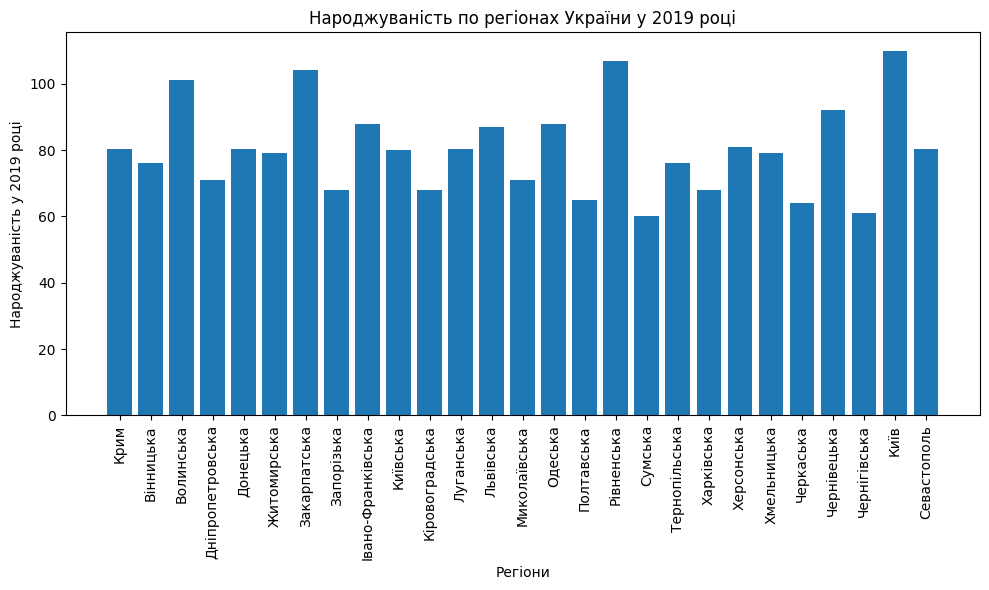

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(data["Регіон"], data["2019"])
plt.xlabel("Регіони")
plt.ylabel("Народжуваність у 2019 році")
plt.title("Народжуваність по регіонах України у 2019 році")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


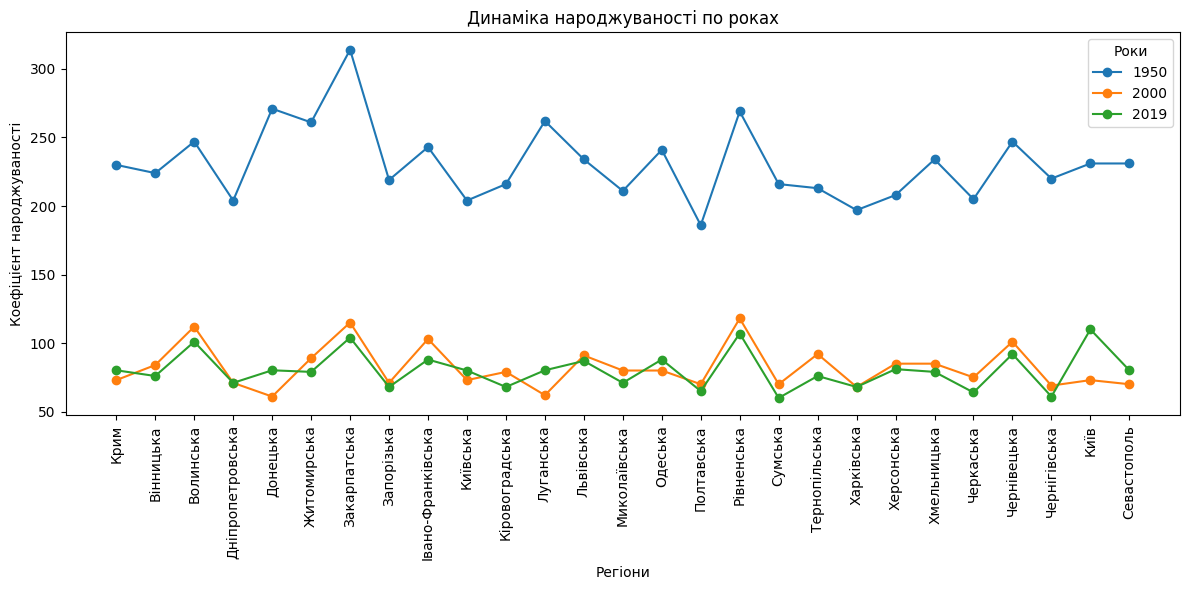

In [ ]:
plt.figure(figsize=(12, 6))
years = ["1950", "2000", "2019"]
for year in years:
    plt.plot(data["Регіон"], data[year], marker='o', label=year)
plt.xlabel("Регіони")
plt.ylabel("Коефіцієнт народжуваності")
plt.title("Динаміка народжуваності по роках")
plt.xticks(rotation=90)
plt.legend(title="Роки")
plt.tight_layout()
plt.show()

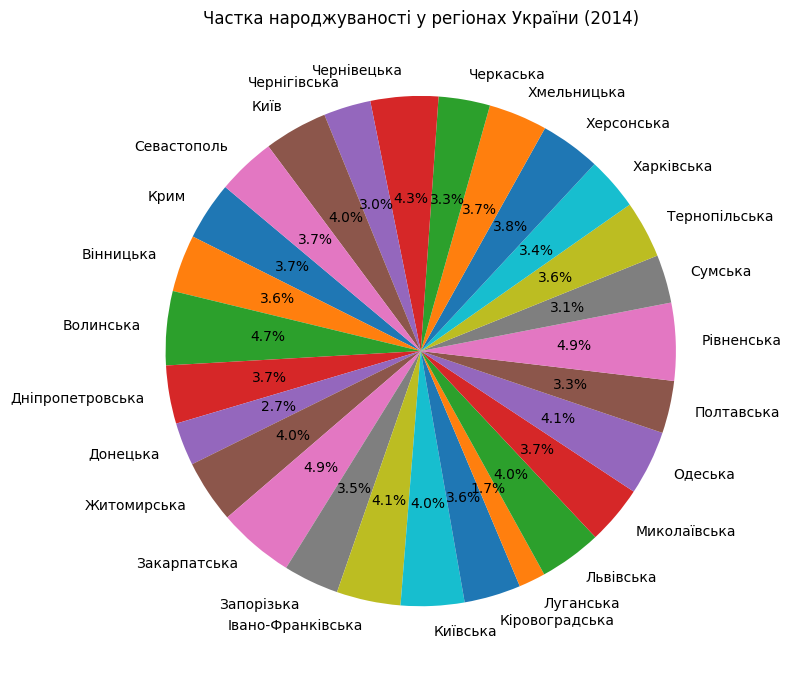

In [53]:
plt.figure(figsize=(8, 8))
plt.pie(data["2014"].dropna(), labels=data["Регіон"], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title("Частка народжуваності у регіонах України (2014)")
plt.tight_layout()
plt.show()

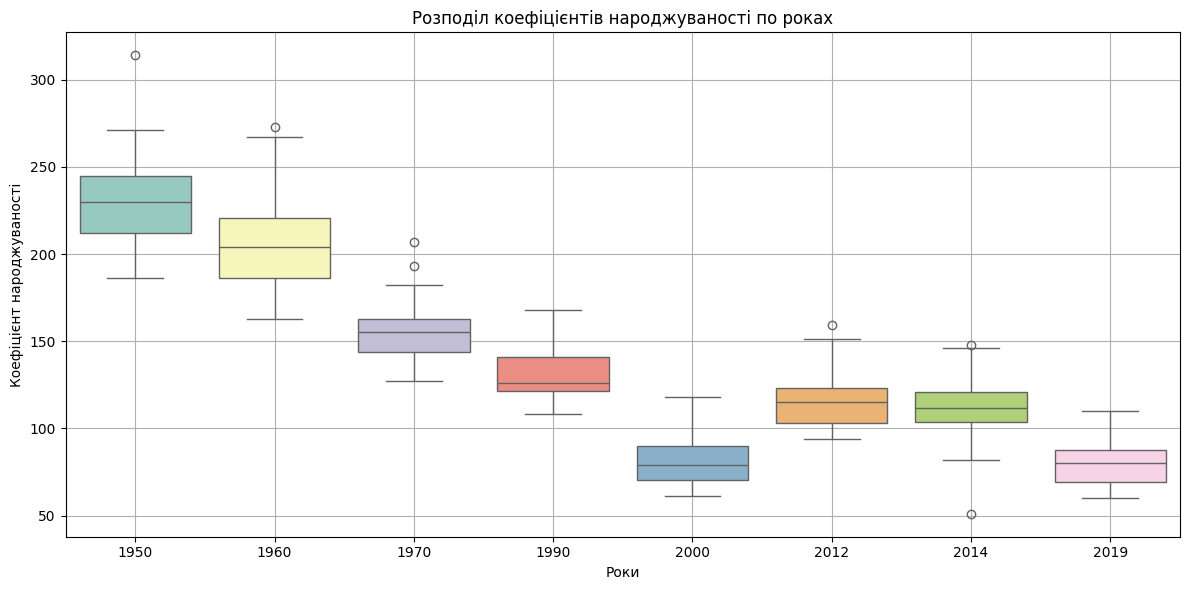

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(columns=["Регіон"]), palette="Set3")
plt.title("Розподіл коефіцієнтів народжуваності по роках")
plt.xlabel("Роки")
plt.ylabel("Коефіцієнт народжуваності")
plt.grid(True)
plt.tight_layout()
plt.show()